In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [38]:
# Data=pd.read_csv("Rating_Prediction_dataset.csv") #Checking the  dataset

In [3]:
Data

,Unnamed: 0,Product_Review,Ratings
0,0,Classy product,5
1,1,Excellent,5
2,2,Really Nice,4
3,3,Great product,5
4,4,Best in the market!,5
...,...,...,...
21995,21995,Worth the money,4
21996,21996,Fabulous!,5
21997,21997,Highly recommended,5
21998,21998,Moderate,2


In [4]:
# Dropping unnecssary index column Unnamed:0 
Data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
Data.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_Review  22000 non-null  object
 1   Ratings         22000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 343.9+ KB


In [7]:
print('No. of Rows :',Data.shape[0])
print('No. of Columns :',Data.shape[1])

No. of Rows : 22000
No. of Columns : 2


In [8]:
Data.isnull().sum() # Checking the null values

Product_Review    0
Ratings           0
dtype: int64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

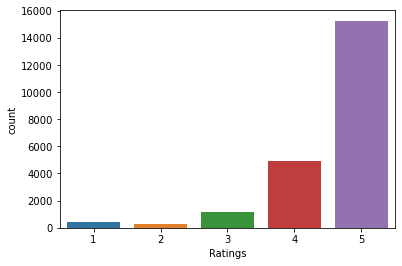

In [9]:
sns.countplot(Data['Ratings']) # Checking the distribution of ratings

In [14]:
# 5 is the highest number of ratings given while 2 is the lowest

In [12]:
# Average Rating given by user
print("Average rating given by users is ",Data['Ratings'].mean())

Average rating given by users is  4.556818181818182


In [13]:
# Average rating given is 4.55

In [15]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# Data Tokenizer

In [16]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
Data['Product_Review'] = Data['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
Data.head()

,Product_Review,Ratings
0,"[classy, product]",5
1,[excellent],5
2,"[really, nice]",4
3,"[great, product]",5
4,"[best, in, the, market]",5


# Stemming and Lematization

In [18]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24



In [19]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [21]:
#Processing review with above Function
processed_review = []

for doc in Data.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

22000


[['classi', 'product'], ['excel'], ['realli', 'nice']]

In [25]:
Data['clean_review']=processed_review  #Assigning this to the dataframe
Data.head()

,Product_Review,Ratings,clean_review
0,"[classy, product]",5,"[classi, product]"
1,[excellent],5,[excel]
2,"[really, nice]",4,"[realli, nice]"
3,"[great, product]",5,"[great, product]"
4,"[best, in, the, market]",5,"[best, the, market]"


In [26]:
Data['Product_Review'] = Data['clean_review'].apply(lambda x:' '.join(y for y in x))
Data.head()

,Product_Review,Ratings,clean_review
0,classi product,5,"[classi, product]"
1,excel,5,[excel]
2,realli nice,4,"[realli, nice]"
3,great product,5,"[great, product]"
4,best the market,5,"[best, the, market]"


# Word Cloud

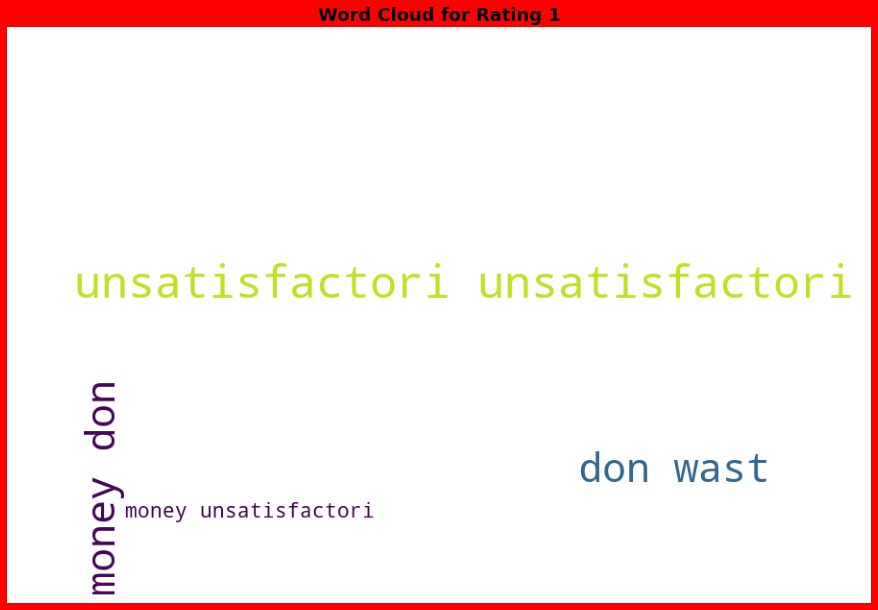

In [28]:
#Getting sense of words in Rating 1
one = Data['Product_Review'][Data['Ratings']==1]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

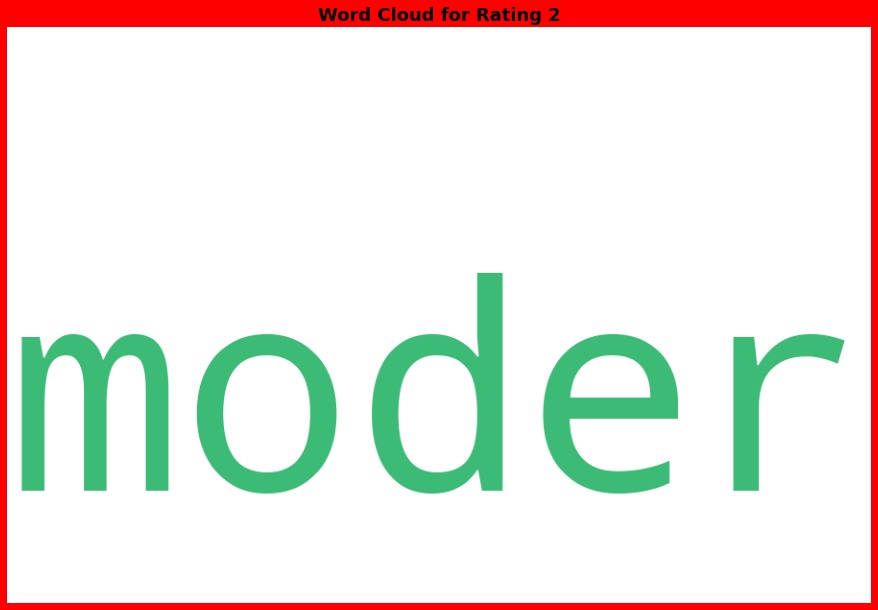

In [30]:
#Getting sense of words in Rating 2
one = Data['Product_Review'][Data['Ratings']==2]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

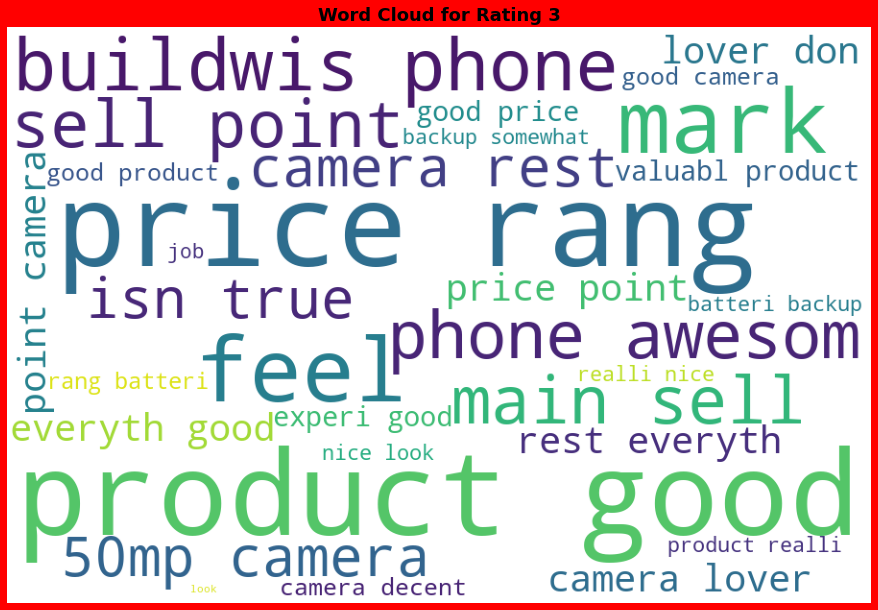

In [31]:
#Getting sense of words in Rating 3
one = Data['Product_Review'][Data['Ratings']==3]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

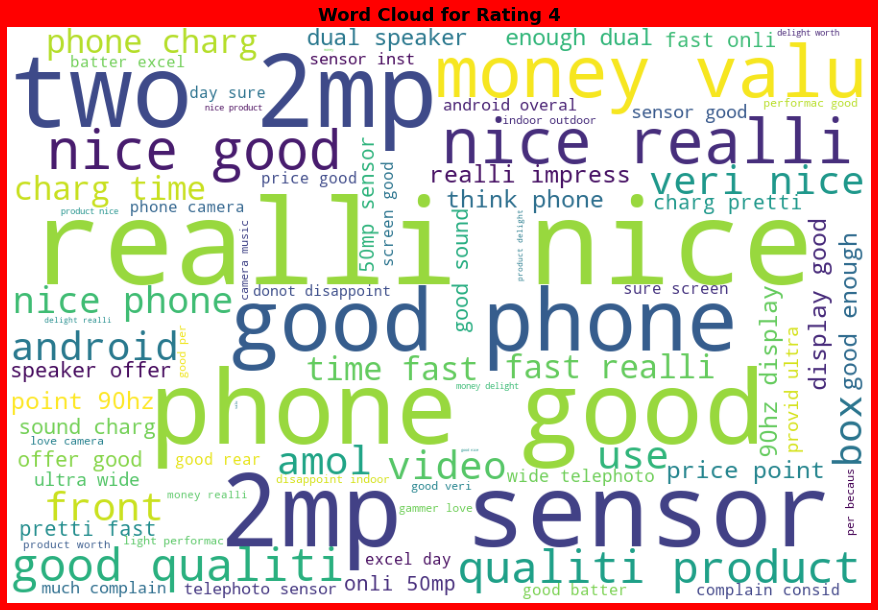

In [32]:
#Getting sense of words in Rating 4
one = Data['Product_Review'][Data['Ratings']==4]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

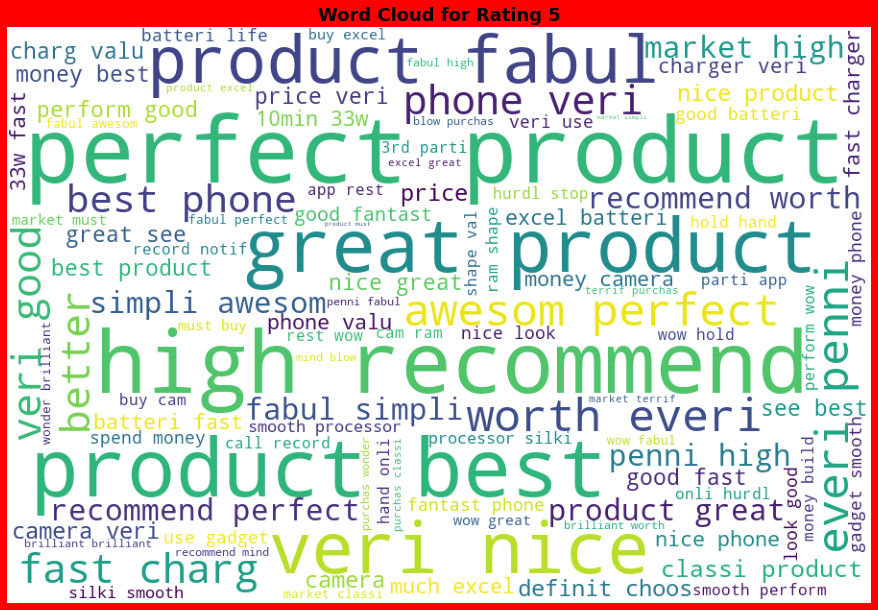

In [33]:
# Getting sense of words in Rating 5
one = Data['Product_Review'][Data['Ratings']==5]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

# Vectorization

In [34]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(Data['Product_Review'])
X=features
Y=Data[['Ratings']]

In [35]:
X.shape

(22000, 168)

In [36]:
Y.shape

(22000, 1)

# Logistic Regression

In [39]:
LR=LogisticRegression()

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=58)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test) # Testing the prediction of test data

In [42]:
LR_accuracy=accuracy_score(y_test,pred_test)*100
LR_accuracy

100.0

In [43]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[  86,    0,    0,    0,    0],
       [   0,   50,    0,    0,    0],
       [   0,    0,  228,    0,    0],
       [   0,    0,    0,  963,    0],
       [   0,    0,    0,    0, 3073]], dtype=int64)

# Decision Tree

In [44]:
DT=DecisionTreeClassifier()

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=58)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test) # Testing the prediction of test data

In [46]:
DT_accuracy=accuracy_score(y_test,pred_test)*100
DT_accuracy

100.0

In [47]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[  86,    0,    0,    0,    0],
       [   0,   50,    0,    0,    0],
       [   0,    0,  228,    0,    0],
       [   0,    0,    0,  963,    0],
       [   0,    0,    0,    0, 3073]], dtype=int64)

# Random Forest Classifier

In [48]:
RF=RandomForestClassifier()

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=58)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test) # Testing the prediction of test data

In [50]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

100.0

In [51]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[  86,    0,    0,    0,    0],
       [   0,   50,    0,    0,    0],
       [   0,    0,  228,    0,    0],
       [   0,    0,    0,  963,    0],
       [   0,    0,    0,    0, 3073]], dtype=int64)

In [52]:
# As we are getting 100% accuracy in all the 3 models, hence we are going ahead with Random Forest Classifier

# Saving Model

In [53]:
import pickle
filename='Rating Prediction Project.pkl'
pickle.dump(RF,open(filename,'wb')) ##saving the model